## IMPORTING LIBRARIES

In [101]:
#Data preparation and preprocessing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score

#Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

## IMPORTING DATASET

In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

## DATA UNDERSTANDING

### Get an overview of the data

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"LeRoy, Miss. Bertha",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Identifying missing values

In [5]:
print('Missing values per feature:\n', train_dataset.isnull().sum())
print('\nDataset shape:', train_dataset.shape)

Missing values per feature:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dataset shape: (891, 12)


### Exploring data per columns (features)

### Survived Column

In [6]:
print(train_dataset['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


> Majority from the dataset did not survive

### Pclass Column

3    491
1    216
2    184
Name: Pclass, dtype: int64


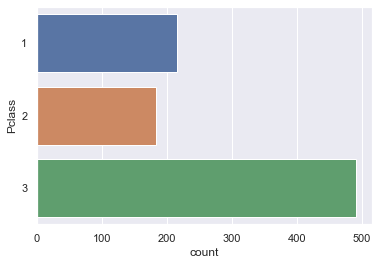

In [7]:
print(train_dataset['Pclass'].value_counts())
sns.set()
sns.countplot(y='Pclass', data=train_dataset)

> Majority of the people is from the class 3

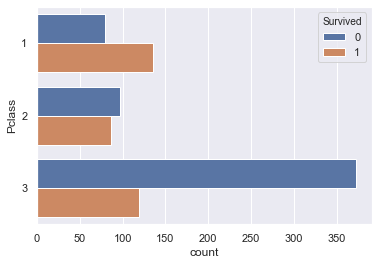

In [8]:
sns.countplot(y='Pclass', hue='Survived',data=train_dataset)

> A lot of people survived in class 1 while a lot of people did not survive in class 3

### Name Column

In [9]:
train_dataset['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

> There is a common pattern from the list. The data contains an honorific title after the surname that ends with a dot. The following code extracts these titles.

In [10]:
train_dataset['Title'] = train_dataset["Name"].copy()
for x in train_dataset["Title"]:
    split = x.split()
    for word in split:
        if word.endswith(".") == True:
            train_dataset["Title"].replace(x, word, inplace=True)

In [11]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


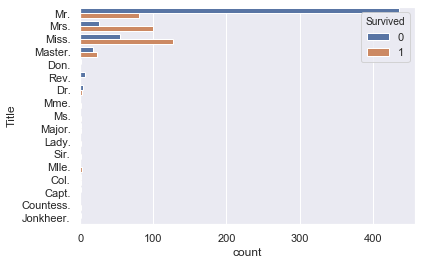

In [12]:
sns.countplot(y='Title', hue='Survived',data=train_dataset)

> From the graph, it can be seen that a lot have survived if they are a Miss., Mrs., or Master.

### Sex Column

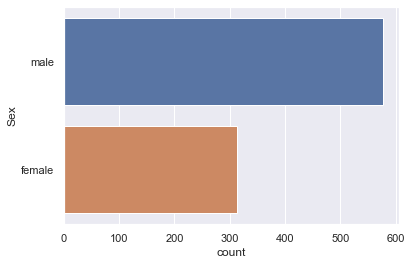

In [13]:
sns.countplot(y='Sex',data=train_dataset)

> Majority of the people in the titanic is Male

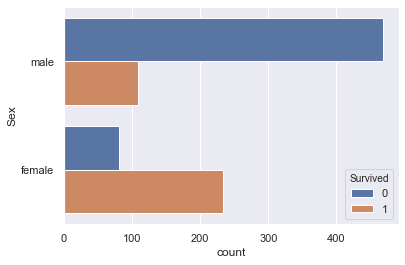

In [14]:
sns.countplot(y='Sex',hue='Survived', data=train_dataset)

> Majority of the male did not survived

### Age Column

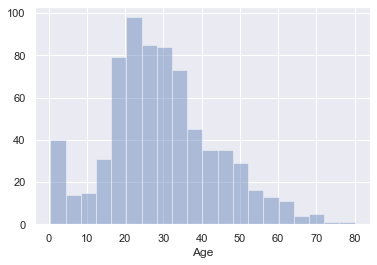

In [15]:
sns.distplot(train_dataset['Age'].dropna(), kde=False)

> Majority of the people are between the age group of approx. 18 to 35.

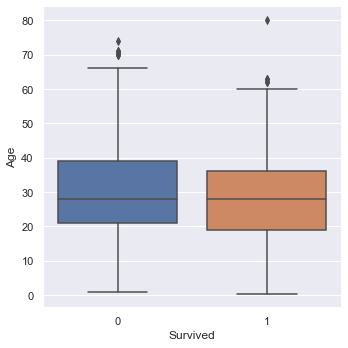

In [16]:
sns.catplot(x = 'Survived', y='Age', data=train_dataset, kind='box')

> The median of the age group has almost the same regardless if they survived or not.

### SibSp Column

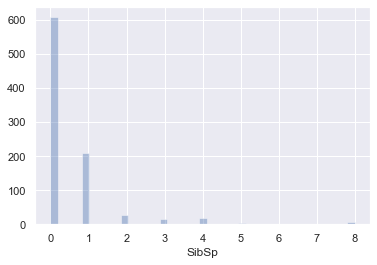

In [17]:
sns.distplot(train_dataset['SibSp'].dropna(), kde=False)

> Majority of the passenger doesn't have any spouse or siblings onboard

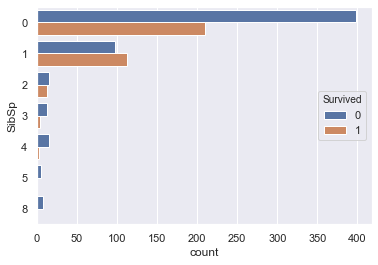

In [18]:
sns.countplot(hue = 'Survived', y='SibSp', data=train_dataset)

> Passengers with 3 or more siblings are most likely not to survive.

### Parch Column

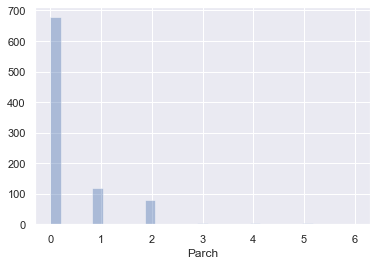

In [19]:
sns.distplot(train_dataset['Parch'].dropna(), kde=False)

> Majority of the passengers doesn't have any parents or children on board

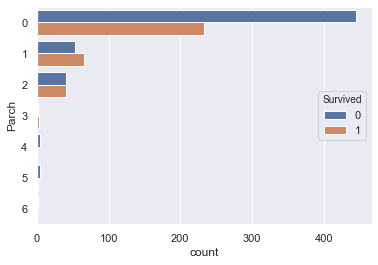

In [20]:
sns.countplot(hue = 'Survived', y='Parch', data=train_dataset)

> Since almost majority of the passenger doesn't have any parents nor children on board, we can see that they are most likely not to survive because they are the majority of the data

### Ticket Column

In [21]:
train_dataset["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

> There is an unusual pattern in the data, there are some ticket numbers that has an initial letters in it. We'll see if it has an effect on the survived column

In [22]:
train_dataset['Ticket Head'] = train_dataset["Ticket"].copy()
for x in train_dataset["Ticket Head"]:
    split = x.split()
    for word in split:
        if len(split) == 2:
            train_dataset["Ticket Head"].replace(x, "Has Heading", inplace=True)
        else:
            train_dataset["Ticket Head"].replace(x, "Normal", inplace=True)

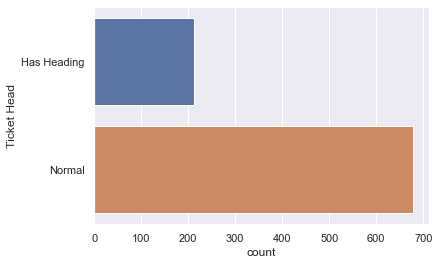

In [23]:
sns.countplot(y='Ticket Head', data=train_dataset)

> Majority of the passengers has a ticket number that contains normal numbering only

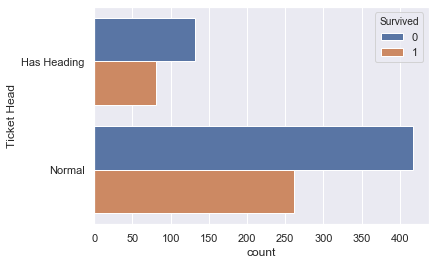

In [24]:
sns.countplot(y='Ticket Head', hue='Survived', data=train_dataset)

> Both type of tickets doesn't have any special relationship on whether they will survive or not.

### Fare Column

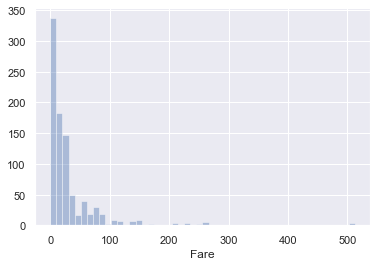

In [25]:
sns.distplot(train_dataset['Fare'].dropna(), kde=False)

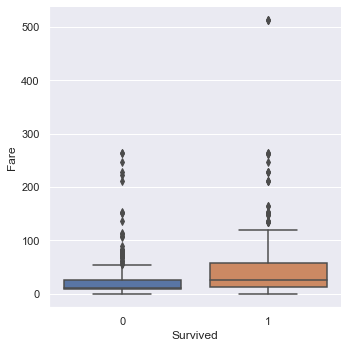

In [26]:
sns.catplot(x = 'Survived', y='Fare', data=train_dataset, kind='box')

> Passengers that survived are more likely to have paid a high fare

### Cabin

Since a lot of data are missing in this column, i have ignored this.

### Embarked

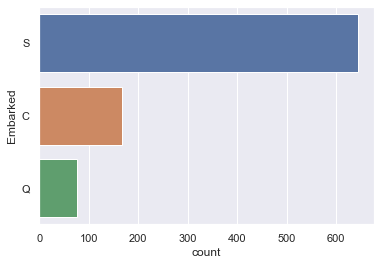

In [27]:
sns.countplot(y='Embarked', data=train_dataset)

> Most of the Passengers have embarked at S (Southampton)

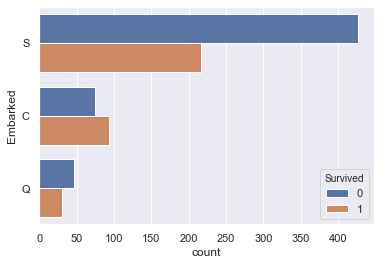

In [28]:
sns.countplot(y='Embarked', hue='Survived', data=train_dataset)

> Majority of passengers that comes from S and Q did not survive, while majority of the passenger that comes from C did survived.

## DATA PREPARATION

Dealing with Missing Values

In [29]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Ticket Head      0
dtype: int64

In [30]:
train_data_pp = train_dataset.copy()
train_data_pp['Age'].fillna(train_data_pp['Age'].mean(), inplace = True)

In [31]:
train_data_pp.drop(['Cabin'], axis=1, inplace = True)

In [32]:
train_data_pp.dropna(subset=['Embarked'], inplace = True)

In [33]:
train_data_pp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Ticket Head    0
dtype: int64

> - The NaN values at the Age column are filled with the mean of the column.
- Dropped the Cabin, since the Cabin has a lot of missing data.
- Then finally dropped the 2 NaN values of Embarked since it is only 2 data.

Data Binning

In [34]:
train_data_pp.drop(['Ticket'], axis=1, inplace = True)
train_data_pp.drop(['Name'], axis=1, inplace = True)

In [35]:
train_data_pp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ticket Head
0,1,0,3,male,22.0,1,0,7.2500,S,Mr.,Has Heading
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs.,Has Heading
2,3,1,3,female,26.0,0,0,7.9250,S,Miss.,Has Heading
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs.,Normal
4,5,0,3,male,35.0,0,0,8.0500,S,Mr.,Normal


> - Replaced the ticket and name column with Title and Ticket head instead of completely removing the data

In [36]:
train_data_pp['Age Group'] = train_data_pp['Age'].copy()
for x in train_data_pp['Age Group']:
    if x>=0 and x<=14:
        train_data_pp['Age Group'].replace(x, "Children", inplace=True)
    elif x>=15 and x<=24:
        train_data_pp['Age Group'].replace(x, "Teen", inplace=True)
    elif x>=25 and x<=64:
        train_data_pp['Age Group'].replace(x, "Adult", inplace=True)
    else:
        train_data_pp['Age Group'].replace(x, "Senior", inplace=True)

train_data_pp.drop(['Age'], axis=1, inplace = True)

In [37]:
train_data_pp.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Ticket Head,Age Group
0,1,0,3,male,1,0,7.2500,S,Mr.,Has Heading,Teen
1,2,1,1,female,1,0,71.2833,C,Mrs.,Has Heading,Adult
2,3,1,3,female,0,0,7.9250,S,Miss.,Has Heading,Adult
3,4,1,1,female,1,0,53.1000,S,Mrs.,Normal,Adult
4,5,0,3,male,0,0,8.0500,S,Mr.,Normal,Adult


In [38]:
train_data_pp['SibSp Bin'] = train_data_pp['SibSp'].copy()
for x in train_data_pp['SibSp Bin']:
    if x==0:
        train_data_pp['SibSp Bin'].replace(x, 0, inplace=True)
    else:
        train_data_pp['SibSp Bin'].replace(x, 1, inplace=True)

In [39]:
train_data_pp['Parch Bin'] = train_data_pp['Parch'].copy()
for x in train_data_pp['Parch Bin']:
    if x==0:
        train_data_pp['Parch Bin'].replace(x, 0, inplace=True)
    else:
        train_data_pp['Parch Bin'].replace(x, 1, inplace=True)

In [40]:
train_data_pp.drop(['SibSp'], axis=1, inplace = True)
train_data_pp.drop(['Parch'], axis=1, inplace = True)

In [41]:
train_data_pp['Title'].value_counts()

Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Jonkheer.      1
Ms.            1
Don.           1
Lady.          1
Sir.           1
Mme.           1
Countess.      1
Capt.          1
Name: Title, dtype: int64

In [42]:
for x in train_data_pp['Title']:
    if x=='Mr.':
        train_data_pp['Title'].replace(x, "Mr.", inplace=True)
    elif x=='Miss.' or x=='Ms.':
        train_data_pp['Title'].replace(x, "Miss.", inplace=True)
    elif x=='Mrs.':
        train_data_pp['Title'].replace(x, "Mrs.", inplace=True)
    else:
        train_data_pp['Title'].replace(x, "Noble", inplace=True)

> - Binned the Age of the passengers by Age group. 0-14: Children, 15-24:Teen, 25-64:Adult, 65>:Senior
- Also Binned the Title as it has a lot of title with 1 value only. Mr. Miss. Mrs. Noble.
- Binned the SibSp and Parch column also. 0 for those passengers that are alone, and 1 if they have someone (sibling or parents) with them.

Separating categorical data and numerical data

In [43]:
data_cat = train_data_pp.select_dtypes(exclude=np.number)
data_num = train_data_pp.select_dtypes(include=np.number)

In [44]:
data_cat.head()

,Sex,Embarked,Title,Ticket Head,Age Group
0,male,S,Mr.,Has Heading,Teen
1,female,C,Mrs.,Has Heading,Adult
2,female,S,Miss.,Has Heading,Adult
3,female,S,Mrs.,Normal,Adult
4,male,S,Mr.,Normal,Adult


In [45]:
data_num.head()

,PassengerId,Survived,Pclass,Fare,SibSp Bin,Parch Bin
0,1,0,3,7.2500,1,0
1,2,1,1,71.2833,1,0
2,3,1,3,7.9250,0,0
3,4,1,1,53.1000,1,0
4,5,0,3,8.0500,0,0


One hot encoding of Categorical Data

In [46]:
cols = data_cat.columns

In [47]:
data_cat_onehot = pd.get_dummies(data_cat, columns = cols)

In [48]:
data_cat_onehot.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Noble,Ticket Head_Has Heading,Ticket Head_Normal,Age Group_Adult,Age Group_Children,Age Group_Senior,Age Group_Teen
0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0
2,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
4,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0


Scaling of numerical values on the Fare column

In [49]:
data_num_sc = data_num.copy()
scaler = StandardScaler()
data_num_sc['Fare'] = scaler.fit_transform(data_num_sc['Fare'].values.reshape(-1,1))

In [50]:
data_num_sc.describe()

,PassengerId,Survived,Pclass,Fare,SibSp Bin,Parch Bin
count,889.000000,889.000000,889.000000,8.890000e+02,889.000000,889.000000
mean,446.000000,0.382452,2.311586,1.092115e-16,0.318335,0.239595
std,256.998173,0.486260,0.834700,1.000563e+00,0.466093,0.427077
min,1.000000,0.000000,1.000000,-6.462044e-01,0.000000,0.000000
25%,224.000000,0.000000,2.000000,-4.872378e-01,0.000000,0.000000
50%,446.000000,0.000000,3.000000,-3.551972e-01,0.000000,0.000000
75%,668.000000,1.000000,3.000000,-2.207954e-02,1.000000,0.000000
max,891.000000,1.000000,3.000000,9.668551e+00,1.000000,1.000000


Combining both dataset

In [51]:
final_dataset = data_cat_onehot.join(data_num_sc)

In [52]:
final_dataset.shape

(889, 21)

In [53]:
final_dataset.describe()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Noble,Ticket Head_Has Heading,...,Age Group_Adult,Age Group_Children,Age Group_Senior,Age Group_Teen,PassengerId,Survived,Pclass,Fare,SibSp Bin,Parch Bin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,8.890000e+02,889.000000,889.000000
mean,0.350956,0.649044,0.188976,0.086614,0.724409,0.204724,0.581552,0.139483,0.074241,0.239595,...,0.674916,0.086614,0.014623,0.223847,446.000000,0.382452,2.311586,1.092115e-16,0.318335,0.239595
std,0.477538,0.477538,0.391710,0.281427,0.447063,0.403727,0.493582,0.346644,0.262310,0.427077,...,0.468670,0.281427,0.120106,0.417055,256.998173,0.486260,0.834700,1.000563e+00,0.466093,0.427077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-6.462044e-01,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,224.000000,0.000000,2.000000,-4.872378e-01,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,446.000000,0.000000,3.000000,-3.551972e-01,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,668.000000,1.000000,3.000000,-2.207954e-02,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,891.000000,1.000000,3.000000,9.668551e+00,1.000000,1.000000


In [54]:
final_dataset.drop(['PassengerId'], axis=1, inplace = True)

> Dropped the Passenger id Column, as it is only a numbering.

## DATA MODELLING

### Splitting of features and label

In [55]:
X = final_dataset.drop(['Survived'], axis=1, inplace=False)
y = final_dataset['Survived']
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2)

Create Empty dataframe for later use

In [56]:
data = {'Model':[], 'Training Accuracy':[], 'Validation Accuracy':[]}

In [57]:
global Total_Results
Total_Results = pd.DataFrame(data)

In [58]:
def data_dict(ModelName, TrainingAcc, ValidationAcc):
    new_data = {'Model':ModelName,
                'Training Accuracy':TrainingAcc,
               'Validation Accuracy':ValidationAcc}
    return new_data

### SVM Algorithm

Using default values

In [59]:
SVM_default = SVC()
SVM_default.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
print('SVM on default parameters')
print('Training Score:', SVM_default.score(X_train, y_train))
print('Validation Score:', SVM_default.score(X_dev, y_dev))

SVM on default parameters
Training Score: 0.8016877637130801
Validation Score: 0.8314606741573034


In [61]:
Total_Results = Total_Results.append(data_dict('SVM (default parameters)', SVM_default.score(X_train, y_train),SVM_default.score(X_dev, y_dev)), ignore_index=True)

In [62]:
Total_Results.head()

,Model,Training Accuracy,Validation Accuracy
0,SVM (default parameters),0.801688,0.831461


Learning Curves

In [63]:
def plot_learning_curves(classifier, X, y, division, cv_folds, scoring):
    """
    classifier = model algorithm
    X = Feature data (whole)
    y = Label data
    division = number of division on the training data
    cv_folds = folds on the cross-validation
    """
    
    train_sizes, train_scores, valid_scores = learning_curve(classifier, X, y, train_sizes=np.linspace(0.1,1.0,division), cv=cv_folds, scoring=scoring)
    train_scores_mean = train_scores.mean(axis=1)
    valid_scores_mean = valid_scores.mean(axis=1)
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy', color='g')
    plt.plot(train_sizes, valid_scores_mean, label = 'Validation accuracy', color='r')
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy')
    plt.legend()

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

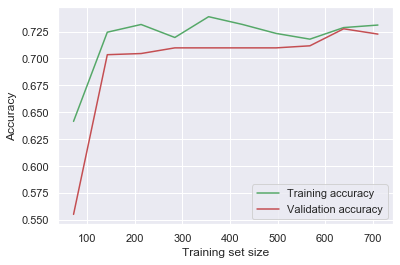

In [64]:
plot_learning_curves(SVM_default, X, y, 10, 5, 'f1')

Using Grid search

In [65]:
SVM_Param = {'C':[1, 2, 4, 8, 10], 
             'kernel':['linear','poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto', 0.1, 0.01, 0.001]}

In [66]:
SVM_grid = GridSearchCV(SVC(), param_grid=SVM_Param, cv=5, refit=True,verbose=3)

In [67]:
SVM_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.748, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.741, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.739, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.852, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.780, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] ....... C=1, gamma=scale, kernel=poly, score=0.797, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV] ....... C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.796, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.739, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.695, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.748, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.741, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.739, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.852, total=   0.0s
[CV] 

[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.617, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.692, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.678, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.641, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.676, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.681, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.615, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

[CV] ...... C=2, gamma=0.1, kernel=sigmoid, score=0.796, total=   0.0s
[CV] C=2, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=2, gamma=0.1, kernel=sigmoid, score=0.746, total=   0.0s
[CV] C=2, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=2, gamma=0.1, kernel=sigmoid, score=0.681, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.748, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.741, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.739, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.838, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] .

[CV] ...... C=4, gamma=auto, kernel=linear, score=0.838, total=   0.0s
[CV] C=4, gamma=auto, kernel=linear ..................................
[CV] ...... C=4, gamma=auto, kernel=linear, score=0.780, total=   0.0s
[CV] C=4, gamma=auto, kernel=poly ....................................
[CV] ........ C=4, gamma=auto, kernel=poly, score=0.790, total=   0.0s
[CV] C=4, gamma=auto, kernel=poly ....................................
[CV] ........ C=4, gamma=auto, kernel=poly, score=0.769, total=   0.0s
[CV] C=4, gamma=auto, kernel=poly ....................................
[CV] ........ C=4, gamma=auto, kernel=poly, score=0.761, total=   0.0s
[CV] C=4, gamma=auto, kernel=poly ....................................
[CV] ........ C=4, gamma=auto, kernel=poly, score=0.852, total=   0.0s
[CV] C=4, gamma=auto, kernel=poly ....................................
[CV] ........ C=4, gamma=auto, kernel=poly, score=0.816, total=   0.0s
[CV] C=4, gamma=auto, kernel=rbf .....................................
[CV] .

[CV] ........ C=4, gamma=0.001, kernel=rbf, score=0.789, total=   0.0s
[CV] C=4, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=4, gamma=0.001, kernel=rbf, score=0.831, total=   0.0s
[CV] C=4, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=4, gamma=0.001, kernel=rbf, score=0.780, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.762, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.727, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.789, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.838, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .

[CV] .......... C=8, gamma=0.1, kernel=rbf, score=0.801, total=   0.0s
[CV] C=8, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=8, gamma=0.1, kernel=sigmoid, score=0.706, total=   0.0s
[CV] C=8, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=8, gamma=0.1, kernel=sigmoid, score=0.643, total=   0.0s
[CV] C=8, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=8, gamma=0.1, kernel=sigmoid, score=0.775, total=   0.0s
[CV] C=8, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=8, gamma=0.1, kernel=sigmoid, score=0.739, total=   0.0s
[CV] C=8, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=8, gamma=0.1, kernel=sigmoid, score=0.652, total=   0.0s
[CV] C=8, gamma=0.01, kernel=linear ..................................
[CV] ...... C=8, gamma=0.01, kernel=linear, score=0.748, total=   0.0s
[CV] C=8, gamma=0.01, kernel=linear ..................................
[CV] .

[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.838, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV] ....... C=10, gamma=scale, kernel=rbf, score=0.809, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................
[CV] ... C=10, gamma=scale, kernel=sigmoid, score=0.706, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................
[CV] ... C=10, gamma=scale, kernel=sigmoid, score=0.650, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................
[CV] ... C=10, gamma=scale, kernel=sigmoid, score=0.775, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................
[CV] ... C=10, gamma=scale, kernel=sigmoid, score=0.746, total=   0.0s
[CV] C=10, gamma=scale, kernel=sigmoid ...............................
[CV] ... C=10, gamma=scale, kernel=sigmoid, score=0.645, total=   0.0s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV] .

[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.739, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.824, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.787, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.748, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.741, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.739, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.838, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 4, 8, 10],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [68]:
print('SVM on grid parameters')
print('Training Score:', SVM_grid.score(X_train, y_train))
print('Validation Score:', SVM_grid.score(X_dev, y_dev))

SVM on grid parameters
Training Score: 0.8523206751054853
Validation Score: 0.8146067415730337


In [69]:
Total_Results = Total_Results.append(data_dict('SVM (grid parameters)', SVM_grid.score(X_train, y_train),SVM_grid.score(X_dev, y_dev)), ignore_index=True)
Total_Results.head()

,Model,Training Accuracy,Validation Accuracy
0,SVM (default parameters),0.801688,0.831461
1,SVM (grid parameters),0.852321,0.814607


### Random Forest Algorithm

Default Paremeters

In [70]:
RFC_default = RandomForestClassifier()

In [71]:
RFC_default.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
print('Random Forest Classifier on default parameters')
print('Training Score:', RFC_default.score(X_train, y_train))
print('Validation Score:', RFC_default.score(X_dev, y_dev))

Random Forest Classifier on default parameters
Training Score: 0.9240506329113924
Validation Score: 0.797752808988764


> Totally overfitting

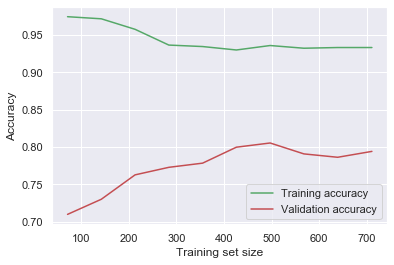

In [73]:
plot_learning_curves(RFC_default, X, y, 10, 5, 'accuracy')

In [74]:
Total_Results = Total_Results.append(data_dict('Random Forest Classifier (default parameters)', RFC_default.score(X_train, y_train),RFC_default.score(X_dev, y_dev)), ignore_index=True)
Total_Results

,Model,Training Accuracy,Validation Accuracy
0,SVM (default parameters),0.801688,0.831461
1,SVM (grid parameters),0.852321,0.814607
2,Random Forest Classifier (default parameters),0.924051,0.797753


Using grid search

In [75]:
RFC_Param = {'bootstrap': [True, False],
             'max_depth': [10, 20, 40, 60, 80, 100, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [200, 400, 600, 800, 1000]
            }

In [76]:
RFC_grid = GridSearchCV(RandomForestClassifier(), param_grid=RFC_Param, refit=True, verbose=3)

In [77]:
RFC_grid.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 1260 candidates, totalling 3780 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.824, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.781, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.805, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.815, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.785, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.801, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.803, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.815, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.781, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.839, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.811, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_spli

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.819, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.835, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.815, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, 

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.777, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.831, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.777, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.768, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.809, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.807, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.776, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.807, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.764, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.785, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.835, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.811, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.781, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.835, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.786, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.768, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.831, total=   0.7s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.807, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.764, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.776, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.843, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.815, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_spli

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.785, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.839, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.815, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.776, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.785, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.831, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.790, total=   0.6s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.785, total=   0.5s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.772, total=   0.5s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.831, total=   0.6s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.790, total=   0.7s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.768, total=   0.8s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.826, total=   0.8s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.824, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.764, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.768, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.835, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.815, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.785, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.831, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.782, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.781, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.785, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.826, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.786, total=   0.5s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.764, total=   0.5s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.831, total=   0.6s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.828, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.776, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.785, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.835, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.819, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.785, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5,

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.776, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.831, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.786, total=   0.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.789, total=   0.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.826, total=   0.3s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.786, total=   0.4s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.781, total=   0.4s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_spli

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.822, total=   0.4s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.828, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.768, total=   0.6s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.785, total=   0.6s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.835, total=   0.6s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.819, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, score=0.768, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, score=0.835, total=   0.7s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.790, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.781, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.772, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.831, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.777, total=   0.3s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.768, total=   0.3s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.826, total=   0.3s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.824, total=   0.5s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.776, total=   0.4s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.785, total=   0.4s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.835, total=   0.4s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.815, total=   0.6s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.781, total=   0.6s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.772, total=   0.5s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.839, total=   0.6s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, score=0.798, total=   0.7s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_

[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.839, total=   0.7s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.773, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.776, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_spli

[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.768, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.822, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.828, total=   0.3s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.785, total=   0.3s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.839, total=   0.3s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.815, total=   0.4s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.785, total=   0.4s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.843, total=   0.4s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.790, total=   0.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.776, total=   0.6s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_spli

[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.831, total=   0.6s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.790, total=   0.7s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.776, total=   0.7s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5

[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.759, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.792, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.836, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.781, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5,

[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.785, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.835, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.819, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_

[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.794, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_spli

[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.781, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.835, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.782, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.781, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.759, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.792, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.798, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.759, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, score=0.772, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, score=0.839, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.819, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.781, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split

[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.764, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.843, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.786, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.768, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_spli

[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.776, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.826, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.782, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.776, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.759, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.792, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.807, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.759, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.819, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.759, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.839, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, score=0.811, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_sa

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.835, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.811, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.835, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_sampl

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.781, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.831, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.782, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.785, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.768, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.801, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.798, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.768, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.819, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.776, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.807, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samp

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.824, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.785, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.839, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.835, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.786, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.772, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.782, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.772, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.831, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.782, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_sa

[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.831, total=   0.6s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.832, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.768, total=   0.8s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.826, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, m

[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.785, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.835, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.819, total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.781, total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_

[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.772, total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.835, total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.786, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_sam

[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.782, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.826, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.786, total=   0.4s
[CV] bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, 

[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.826, total=   0.3s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.836, total=   0.5s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.772, total=   0.5s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.826, total=   0.5s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_sam

[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.785, total=   0.4s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.839, total=   0.4s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.819, total=   0.6s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.785, total=   0.6s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_sam

[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.794, total=   0.5s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.781, total=   0.5s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.847, total=   0.6s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, score=0.794, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2

[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.831, total=   0.5s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.790, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.776, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.831, total=   0.7s
[CV] bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, m

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.785, total=   0.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.805, total=   0.9s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.819, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.793, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.785, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.826, total=   0.2s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.836, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.785, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.832, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.843, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.832, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samp

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.839, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.811, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.843, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.785, total=   0.5s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.805, total=   0.5s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.803, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.789, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.832, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.776, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.835, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, score=0.840, total=   0.8s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_sa

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.839, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.840, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.785, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.835, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.772, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.847, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.803, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.781, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.764, total=   0.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.792, total=   0.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.798, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.755, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.845, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.768, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.831, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.845, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samp

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.845, total=   0.5s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.768, total=   0.5s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.831, total=   0.5s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.835, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.803, total=   0.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.807, total=   0.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.835, total=   0.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.803, total=   0.7s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_sa

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.801, total=   0.7s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.811, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.768, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.801, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_sampl

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.776, total=   0.7s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.818, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.836, total=   0.2s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.772, total=   0.2s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.772, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.843, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.807, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.811, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.781, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.831, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.807, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samp

[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.801, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.811, total=   0.5s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.768, total=   0.5s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.801, total=   0.5s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.776, total=   0.5s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.818, total=   0.4s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.832, total=   0.6s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.832, total=   0.6s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.764, total=   0.6s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.843, total=   0.6s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, score=0.824, total=   0.7s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_sa

[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.843, total=   0.6s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.803, total=   0.8s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.772, total=   0.8s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.839, total=   0.7s
[CV] bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_sampl

[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.764, total=   0.9s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.792, total=   0.8s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.798, total=   0.2s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.772, total=   0.2s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_

[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.781, total=   0.2s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.826, total=   0.1s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.832, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.776, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.828, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.768, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.839, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.832, total=   0.4s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samp

[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.798, total=   0.4s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.839, total=   0.4s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.764, total=   0.5s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.792, total=   0.5s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.807, total=   0.7s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.751, total=   0.7s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.849, total=   0.6s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.764, total=   0.6s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.835, total=   0.6s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, score=0.849, total=   0.7s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_sa

[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.835, total=   0.7s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.836, total=   0.8s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.768, total=   0.8s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.831, total=   0.8s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_sampl

[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.776, total=   0.7s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.839, total=   0.7s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.807, total=   0.1s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.772, total=   0.1s
[CV] bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_

[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.764, total=   0.2s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.792, total=   0.2s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.798, total=   0.4s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.759, total=   0.4s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.849, total=   0.3s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.768, total=   0.3s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.831, total=   0.3s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.849, total=   0.5s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samp

[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.840, total=   0.4s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.776, total=   0.4s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.835, total=   0.4s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.839, total=   0.4s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.803, total=   0.6s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.772, total=   0.5s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.803, total=   0.5s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.772, total=   0.5s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.843, total=   0.5s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.803, total=   0.7s
[CV] bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_sa

[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.801, total=   0.6s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.815, total=   0.8s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.764, total=   0.8s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.801, total=   0.8s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_sampl

[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.781, total=   0.8s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.826, total=   0.8s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.832, total=   0.1s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.772, total=   0.2s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_

[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.772, total=   0.1s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.839, total=   0.1s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.807, total=   0.3s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.776, total=   0.3s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.803, total=   0.3s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.803, total=   0.4s
[CV] bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samp

[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, score=0.801, total=   0.3s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.811, total=   0.5s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.768, total=   0.5s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600, score=0.801, total=   0.5s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.776, total=   0.4s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600, score=0.826, total=   0.5s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.840, total=   0.6s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.781, total=   0.6s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.832, total=   0.6s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.768, total=   0.6s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.843, total=   0.6s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, score=0.828, total=   0.7s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_sa

[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.843, total=   0.6s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.807, total=   0.7s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.772, total=   0.7s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, score=0.843, total=   0.7s
[CV] bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_sampl

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.755, total=   0.8s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, score=0.792, total=   0.8s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.807, total=   0.2s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.764, total=   0.2s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.781, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.809, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.840, total=   0.3s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.832, total=   0.3s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.764, total=   0.3s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400, score=0.843, total=   0.3s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.828, total=   0.4s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, 

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.839, total=   0.3s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.803, total=   0.4s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.776, total=   0.5s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.835, total=   0.4s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.764, total=   0.5s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600, score=0.792, total=   0.5s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.803, total=   0.7s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.764, total=   0.7s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.849, total=   0.6s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.768, total=   0.6s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.831, total=   0.6s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, score=0.849, total=   0.8s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.835, total=   0.6s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.832, total=   0.8s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.776, total=   0.8s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, score=0.831, total=   0.8s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, m

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.772, total=   0.7s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, score=0.839, total=   0.7s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.807, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.772, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_

[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.747, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.792, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.794, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.764, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1,

[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.845, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.755, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600, score=0.849, total=   0.5s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_

[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, score=0.835, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.836, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.768, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600, score=0.831, total=   0.5s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2,

[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.772, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600, score=0.843, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.807, total=   0.6s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4,

[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.803, total=   0.6s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.772, total=   0.6s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.843, total=   0.6s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.803, total=   0.7s
[CV] bootstrap=False, max_depth=None, max_features=auto, min_sample

[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.801, total=   0.6s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.811, total=   0.8s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.768, total=   0.8s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.801, total=   0.8s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_l

[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.781, total=   0.8s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.822, total=   0.8s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.840, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.768, total=   0.2s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf

[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.772, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.835, total=   0.1s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.811, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4,

[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.803, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.772, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400, score=0.839, total=   0.3s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600 
[CV]  bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600, score=0.807, total=   0.4s
[CV] bootstrap=False, max_depth=None, max_features=sqrt, min_samples_

[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed: 28.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [78]:
RFC_grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 800}

In [79]:
print('Random Forest Classifier on grid parameters')
print('Training Score:', RFC_grid.score(X_train, y_train))
print('Validation Score:', RFC_grid.score(X_dev, y_dev))

Random Forest Classifier on grid parameters
Training Score: 0.8917018284106891
Validation Score: 0.8314606741573034


In [80]:
Total_Results = Total_Results.append(data_dict('Random Forest Classifier (grid parameters)', RFC_grid.score(X_train, y_train),RFC_grid.score(X_dev, y_dev)), ignore_index=True)
Total_Results

,Model,Training Accuracy,Validation Accuracy
0,SVM (default parameters),0.801688,0.831461
1,SVM (grid parameters),0.852321,0.814607
2,Random Forest Classifier (default parameters),0.924051,0.797753
3,Random Forest Classifier (grid parameters),0.891702,0.831461


### XGBoost Algorithm

Default Parameters

In [81]:
XGB_Default = XGBClassifier()

In [82]:
XGB_Default.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [83]:
print('XGBoost on default parameters')
print('Training Score:', XGB_Default.score(X_train, y_train))
print('Validation Score:', XGB_Default.score(X_dev, y_dev))

XGBoost on default parameters
Training Score: 0.9310829817158931
Validation Score: 0.8370786516853933


> Overfitting

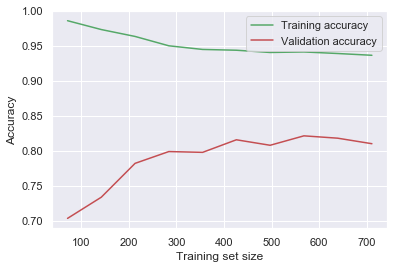

In [84]:
plot_learning_curves(XGB_Default, X, y, 10, 5, 'accuracy')

Using grid parameters

In [85]:
XGB_param = {'learning_rate':[0.01, 0.05, 0.10],
    'max_depth':[3, 4, 5, 6, 7, 8],
    'min_child_weight':[1, 3, 5, 7],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7],
    'gamma':[0, 1, 5],
    'n_estimators':[10,100,1000],    
}

In [86]:
XGB_grid = GridSearchCV(XGBClassifier(), param_grid=XGB_param, refit=True, verbose=3)

In [87]:
XGB_grid.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.772, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.809, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, 

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.764, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.3s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.769, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, l

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.806, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, l

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.806, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, l

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, l

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=0, l

[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.2s
[CV] colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.773, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.769, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, l

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, l

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, l

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, l

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=1, l

[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.759, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.759, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.769, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.759, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.769, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.759, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.769, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.759, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.769, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.759, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, ga

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.764, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, l

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.764, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, l

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.773, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.764, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, l

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.773, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.764, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, l

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.773, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.764, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.752, total=   0.0s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.3, gamma=5, l

[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.773, total=   0.2s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.764, total=   0.3s
[CV] colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.3, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.835, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.835, total=   0.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.835, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.811, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.3s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.835, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.811, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.815, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.806, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.839, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, l

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.815, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, l

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.815, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, l

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.819, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.815, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, l

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.819, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.824, total=   0.0s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=0, l

[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.819, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.811, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, l

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, l

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, l

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, l

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.819, total=   0.0s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=1, l

[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.3s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.769, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.769, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.769, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, ga

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.761, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.769, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.765, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, l

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.769, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, l

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, l

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, l

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.4, gamma=5, l

[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.4, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, l

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.824, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, l

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.819, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, l

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.811, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.806, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.811, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, l

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.811, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.806, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=0, l

[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.811, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.806, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, l

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.790, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, l

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, l

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, l

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=1, l

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.748, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.765, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.761, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.773, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.761, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.748, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.761, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.768, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.756, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.761, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, l

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, l

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, l

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, l

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.5, gamma=5, l

[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.2s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.3s
[CV] colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.794, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.798, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.765, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.803, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.839, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.815, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.835, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.810, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.835, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.815, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.835, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.815, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.843, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.815, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.843, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.811, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.810, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, l

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.802, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.2s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, l

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.811, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.793, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.815, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, l

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.805, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.811, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, l

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.801, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.811, total=   0.0s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=0, l

[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.807, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.797, total=   0.3s
[CV] colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.801, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.809, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.782, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.789, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.761, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.798, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.785, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.822, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.786, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.769, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, l

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.818, total=   0.2s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.803, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, l

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.781, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.807, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, l

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.811, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, l

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.811, total=   0.0s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=1, l

[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.790, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.776, total=   0.3s
[CV] colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.814, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.777, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10, score=0.761, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10, score=0.773, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, ga

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10, score=0.777, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10, score=0.786, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, l

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.2s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, l

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, l

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, l

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10, score=0.794, total=   0.0s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10 
[CV]  colsample_bytree=0.7, gamma=5, l

[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.782, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.772, total=   0.3s
[CV] colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000 
[CV]  colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, score=0.831, total=   0.3s


[Parallel(n_jobs=1)]: Done 7776 out of 7776 | elapsed: 12.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'g

In [88]:
XGB_grid.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 10}

In [89]:
print('XGBoost on grid parameters')
print('Training Score:', XGB_grid.score(X_train, y_train))
print('Validation Score:', XGB_grid.score(X_dev, y_dev))

XGBoost on grid parameters
Training Score: 0.8790436005625879
Validation Score: 0.8314606741573034


In [90]:
Total_Results = Total_Results.append(data_dict('XGboost (default parameters)', XGB_Default.score(X_train, y_train),XGB_Default.score(X_dev, y_dev)), ignore_index=True)
Total_Results

,Model,Training Accuracy,Validation Accuracy
0,SVM (default parameters),0.801688,0.831461
1,SVM (grid parameters),0.852321,0.814607
2,Random Forest Classifier (default parameters),0.924051,0.797753
3,Random Forest Classifier (grid parameters),0.891702,0.831461
4,XGboost (default parameters),0.931083,0.837079


In [91]:
Total_Results = Total_Results.append(data_dict('XGboost (grid parameters)', XGB_grid.score(X_train, y_train),XGB_grid.score(X_dev, y_dev)), ignore_index=True)
Total_Results

,Model,Training Accuracy,Validation Accuracy
0,SVM (default parameters),0.801688,0.831461
1,SVM (grid parameters),0.852321,0.814607
2,Random Forest Classifier (default parameters),0.924051,0.797753
3,Random Forest Classifier (grid parameters),0.891702,0.831461
4,XGboost (default parameters),0.931083,0.837079
5,XGboost (grid parameters),0.879044,0.831461


> As of now, random forest classifer with grid parameters has the highest validation accuracy.

### Artificial Neural Networks

In [92]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [292]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 50 )

In [293]:
model_1 = Sequential([
    Dense(19, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.20)),
    Dropout(0.44),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.018)),
    Dropout(0.32),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.015)),
    Dropout(0.25),
    Dense(1, activation='sigmoid'),
])

In [294]:
optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [295]:
history = model_1.fit(X_train, y_train, epochs=2000, batch_size=50, validation_data=(X_dev, y_dev), callbacks=[es])

Train on 711 samples, validate on 178 samples
Epoch 1/2000
711/711 [==============================] - 1s 812us/sample - loss: 8.6005 - acc: 0.5851 - val_loss: 7.6220 - val_acc: 0.6292
Epoch 2/2000
711/711 [==============================] - 0s 52us/sample - loss: 6.9669 - acc: 0.6118 - val_loss: 6.1505 - val_acc: 0.6292
Epoch 3/2000
711/711 [==============================] - 0s 45us/sample - loss: 5.6257 - acc: 0.6118 - val_loss: 4.9594 - val_acc: 0.6292
Epoch 4/2000
711/711 [==============================] - 0s 48us/sample - loss: 4.5391 - acc: 0.6146 - val_loss: 4.0050 - val_acc: 0.6292
Epoch 5/2000
711/711 [==============================] - 0s 49us/sample - loss: 3.6757 - acc: 0.6160 - val_loss: 3.2462 - val_acc: 0.6292
Epoch 6/2000
711/711 [==============================] - 0s 50us/sample - loss: 2.9894 - acc: 0.6160 - val_loss: 2.6487 - val_acc: 0.6292
Epoch 7/2000
711/711 [==============================] - 0s 50us/sample - loss: 2.4485 - acc: 0.6160 - val_loss: 2.1752 - val_acc: 0

711/711 [==============================] - 0s 51us/sample - loss: 0.5279 - acc: 0.7918 - val_loss: 0.4612 - val_acc: 0.8258
Epoch 61/2000
711/711 [==============================] - 0s 49us/sample - loss: 0.5255 - acc: 0.7961 - val_loss: 0.4660 - val_acc: 0.8258
Epoch 62/2000
711/711 [==============================] - 0s 49us/sample - loss: 0.5207 - acc: 0.7989 - val_loss: 0.4655 - val_acc: 0.8258
Epoch 63/2000
711/711 [==============================] - 0s 50us/sample - loss: 0.5298 - acc: 0.7876 - val_loss: 0.4867 - val_acc: 0.8034
Epoch 64/2000
711/711 [==============================] - 0s 43us/sample - loss: 0.5284 - acc: 0.7989 - val_loss: 0.4640 - val_acc: 0.8483
Epoch 65/2000
711/711 [==============================] - 0s 46us/sample - loss: 0.5304 - acc: 0.7918 - val_loss: 0.4880 - val_acc: 0.8146
Epoch 66/2000
711/711 [==============================] - 0s 43us/sample - loss: 0.5305 - acc: 0.7792 - val_loss: 0.4609 - val_acc: 0.8539
Epoch 67/2000
711/711 [=========================

711/711 [==============================] - 0s 50us/sample - loss: 0.5165 - acc: 0.8003 - val_loss: 0.4552 - val_acc: 0.8315
Epoch 120/2000
711/711 [==============================] - 0s 46us/sample - loss: 0.5074 - acc: 0.7989 - val_loss: 0.4590 - val_acc: 0.8315
Epoch 121/2000
711/711 [==============================] - 0s 38us/sample - loss: 0.5048 - acc: 0.8129 - val_loss: 0.4509 - val_acc: 0.8258
Epoch 122/2000
711/711 [==============================] - 0s 46us/sample - loss: 0.5015 - acc: 0.8129 - val_loss: 0.4622 - val_acc: 0.8371
Epoch 123/2000
711/711 [==============================] - 0s 48us/sample - loss: 0.5082 - acc: 0.8003 - val_loss: 0.4480 - val_acc: 0.8258
Epoch 124/2000
711/711 [==============================] - 0s 43us/sample - loss: 0.5069 - acc: 0.7975 - val_loss: 0.4561 - val_acc: 0.8315
Epoch 125/2000
711/711 [==============================] - 0s 45us/sample - loss: 0.5029 - acc: 0.8017 - val_loss: 0.4541 - val_acc: 0.8258
Epoch 126/2000
711/711 [==================

711/711 [==============================] - 0s 39us/sample - loss: 0.4967 - acc: 0.8087 - val_loss: 0.4560 - val_acc: 0.8371
Epoch 179/2000
711/711 [==============================] - 0s 41us/sample - loss: 0.5056 - acc: 0.8073 - val_loss: 0.4488 - val_acc: 0.8539
Epoch 180/2000
711/711 [==============================] - 0s 42us/sample - loss: 0.5042 - acc: 0.7989 - val_loss: 0.4517 - val_acc: 0.8427
Epoch 181/2000
711/711 [==============================] - 0s 42us/sample - loss: 0.4885 - acc: 0.8143 - val_loss: 0.4528 - val_acc: 0.8315
Epoch 182/2000
711/711 [==============================] - 0s 45us/sample - loss: 0.4977 - acc: 0.8143 - val_loss: 0.4453 - val_acc: 0.8539
Epoch 183/2000
711/711 [==============================] - 0s 48us/sample - loss: 0.4877 - acc: 0.8143 - val_loss: 0.4597 - val_acc: 0.8371
Epoch 184/2000
711/711 [==============================] - 0s 46us/sample - loss: 0.4986 - acc: 0.8087 - val_loss: 0.4475 - val_acc: 0.8258
Epoch 185/2000
711/711 [==================

711/711 [==============================] - 0s 46us/sample - loss: 0.4849 - acc: 0.8228 - val_loss: 0.4577 - val_acc: 0.8315
Epoch 238/2000
711/711 [==============================] - 0s 41us/sample - loss: 0.4795 - acc: 0.8228 - val_loss: 0.4448 - val_acc: 0.8427
Epoch 239/2000
711/711 [==============================] - 0s 48us/sample - loss: 0.4908 - acc: 0.8031 - val_loss: 0.4513 - val_acc: 0.8483
Epoch 240/2000
711/711 [==============================] - 0s 48us/sample - loss: 0.4917 - acc: 0.8045 - val_loss: 0.4447 - val_acc: 0.8539
Epoch 241/2000
711/711 [==============================] - 0s 48us/sample - loss: 0.4948 - acc: 0.7975 - val_loss: 0.4460 - val_acc: 0.8427
Epoch 242/2000
711/711 [==============================] - 0s 48us/sample - loss: 0.4860 - acc: 0.8298 - val_loss: 0.4580 - val_acc: 0.8371
Epoch 243/2000
711/711 [==============================] - 0s 53us/sample - loss: 0.4900 - acc: 0.8045 - val_loss: 0.4429 - val_acc: 0.8483
Epoch 244/2000
711/711 [==================

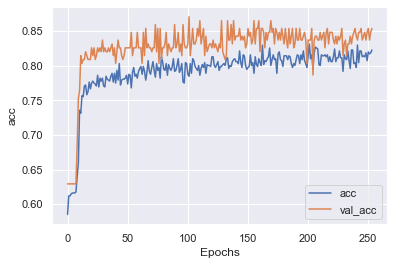

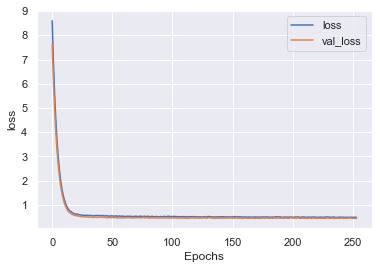

In [296]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [297]:
print('Artificial Neural Network')
print('Training Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])

Artificial Neural Network
Training Accuracy: 0.8227848
Validation Accuracy: 0.85393256


In [298]:
Total_Results = Total_Results.append(data_dict('Artificial Neural Network v2 (with Early Stopping)', history.history['acc'][-1], history.history['val_acc'][-1]), ignore_index=True)
Total_Results

,Model,Training Accuracy,Validation Accuracy
0,SVM (default parameters),0.801688,0.831461
1,SVM (grid parameters),0.852321,0.814607
2,Random Forest Classifier (default parameters),0.924051,0.797753
3,Random Forest Classifier (grid parameters),0.891702,0.831461
4,XGboost (default parameters),0.931083,0.837079
5,XGboost (grid parameters),0.879044,0.831461
6,Artificial Neural Network (with Early Stopping),0.817159,0.842697
7,Artificial Neural Network v2 (with Early Stopp...,0.822785,0.853933


> I decided to choose that Artificial Neural Network model as it has the highest validation accuracy.

## SUBMISSION OF RESULT

Perform data preprocessing on the test dataset

In [228]:
test_dataset['Title'] = test_dataset["Name"].copy()
for x in test_dataset["Title"]:
    split = x.split()
    for word in split:
        if word.endswith(".") == True:
            test_dataset["Title"].replace(x, word, inplace=True)

In [229]:
test_dataset['Ticket Head'] = test_dataset["Ticket"].copy()
for x in test_dataset["Ticket Head"]:
    split = x.split()
    for word in split:
        if len(split) == 2:
            test_dataset["Ticket Head"].replace(x, "Has Heading", inplace=True)
        else:
            test_dataset["Ticket Head"].replace(x, "Normal", inplace=True)

In [230]:
test_dataset_pp = test_dataset.copy()
test_dataset_pp['Age'].fillna(test_dataset_pp['Age'].mean(), inplace = True)
test_dataset_pp['Fare'].fillna(test_dataset_pp['Fare'].mean(), inplace = True)

In [231]:
test_dataset_pp.drop(['Cabin'], axis=1, inplace = True)

In [232]:
test_dataset_pp.dropna(subset=['Embarked'], inplace = True)

In [233]:
test_dataset_pp.drop(['Ticket'], axis=1, inplace = True)
test_dataset_pp.drop(['Name'], axis=1, inplace = True)

In [234]:
test_dataset_pp['Age Group'] = test_dataset_pp['Age'].copy()
for x in test_dataset_pp['Age Group']:
    if x>=0 and x<=14:
        test_dataset_pp['Age Group'].replace(x, "Children", inplace=True)
    elif x>=15 and x<=24:
        test_dataset_pp['Age Group'].replace(x, "Teen", inplace=True)
    elif x>=25 and x<=64:
        test_dataset_pp['Age Group'].replace(x, "Adult", inplace=True)
    else:
        test_dataset_pp['Age Group'].replace(x, "Senior", inplace=True)

test_dataset_pp.drop(['Age'], axis=1, inplace = True)

In [235]:
test_dataset_pp['SibSp Bin'] = test_dataset_pp['SibSp'].copy()
for x in test_dataset_pp['SibSp Bin']:
    if x==0:
        test_dataset_pp['SibSp Bin'].replace(x, 0, inplace=True)
    else:
        test_dataset_pp['SibSp Bin'].replace(x, 1, inplace=True)

In [236]:
test_dataset_pp['Parch Bin'] = test_dataset_pp['Parch'].copy()
for x in test_dataset_pp['Parch Bin']:
    if x==0:
        test_dataset_pp['Parch Bin'].replace(x, 0, inplace=True)
    else:
        test_dataset_pp['Parch Bin'].replace(x, 1, inplace=True)

In [237]:
test_dataset_pp.drop(['SibSp'], axis=1, inplace = True)
test_dataset_pp.drop(['Parch'], axis=1, inplace = True)

In [238]:
for x in test_dataset_pp['Title']:
    if x=='Mr.':
        test_dataset_pp['Title'].replace(x, "Mr.", inplace=True)
    elif x=='Miss.' or x=='Ms.':
        test_dataset_pp['Title'].replace(x, "Miss.", inplace=True)
    elif x=='Mrs.':
        test_dataset_pp['Title'].replace(x, "Mrs.", inplace=True)
    else:
        test_dataset_pp['Title'].replace(x, "Noble", inplace=True)

In [239]:
data_cat_test = test_dataset_pp.select_dtypes(exclude=np.number)
data_num_test = test_dataset_pp.select_dtypes(include=np.number)

In [240]:
cols_test = data_cat_test.columns

In [241]:
data_cat_onehot_test = pd.get_dummies(data_cat_test, columns = cols_test)

In [242]:
data_num_sc_test = data_num_test.copy()
scaler_test = StandardScaler()
data_num_sc_test['Fare'] = scaler_test.fit_transform(data_num_sc_test['Fare'].values.reshape(-1,1))

In [243]:
final_test_dataset = data_cat_onehot_test.join(data_num_sc_test)

In [244]:
final_test_dataset.drop(['PassengerId'], axis=1, inplace = True)

Predicting New Results

In [299]:
Predict = model_1.predict_classes(final_test_dataset)

In [300]:
pred = np.ndarray.flatten(Predict)

In [301]:
Submit = pd.DataFrame({"PassengerId":test_dataset["PassengerId"],
                      "Survived": pred})

In [302]:
Submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [303]:
Submit.to_csv("Submit_ANN.csv", index=False)